In [361]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Fetching Dataset


In [362]:

# fetch dataset 
adult = fetch_ucirepo(id=2) 

  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  



In [363]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


# Data Cleaning

### Combining the two datsets so its easier to remove outliers at once


In [364]:

X['income'] = y['income']
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [365]:
for column in X.columns:
    if X[column].dtype == 'object':
        unique_values = X[column].unique()
        print(f"\n{column}: \n{unique_values}")


workclass: 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

education: 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status: 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation: 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

relationship: 
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race: 
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex: 
['Male' 'Female']

native-country: 
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico

In [366]:
X["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [367]:
X["education-num"].value_counts()

education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

### Thus we can see that education and education-num provide the same information hence we can conclude that the column is redundant. 


In [368]:
X = X.drop("education", axis=1)  

In [369]:
X["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

### Compressing these multiple fields into a simpler set because some are not required


In [370]:
X["marital-status"] = X["marital-status"].replace(["Married-civ-spouse", "Married-AF-spouse"], "Married")
X["marital-status"] = X["marital-status"].replace(["Divorced", "Separated", "Widowed","Married-spouse-absent" ], "Other")

In [371]:
X["marital-status"].value_counts()


marital-status
Married          22416
Never-married    16117
Other            10309
Name: count, dtype: int64

### Handling Null Values using ForwardFill Method

In [372]:
X.replace("?", np.NaN, inplace=True)
X.fillna(method="ffill",inplace=True)


C:\Users\navam\AppData\Local\Temp\ipykernel_14192\1333714476.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method="ffill",inplace=True)


In [373]:
X["fnlwgt"].value_counts()


fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64

In [374]:
print(X["fnlwgt"].unique().shape)


(28523,)


### Since these values are highly varied we can conclude that its not an efficient mean of measuring the capital gain

In [375]:
X.drop("fnlwgt", axis=1)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Other,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Private,9,Other,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,13,Married,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,13,Other,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [376]:
income = pd.get_dummies(X["income"], drop_first=True )
X.loc[:, "income"] = X["income"].str.strip().replace('<=50K.', '<=50K')
X.loc[:, "income"] = X["income"].str.strip().replace('>50K.', '>50K')


X["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

### Removing Outliers in the Dataset

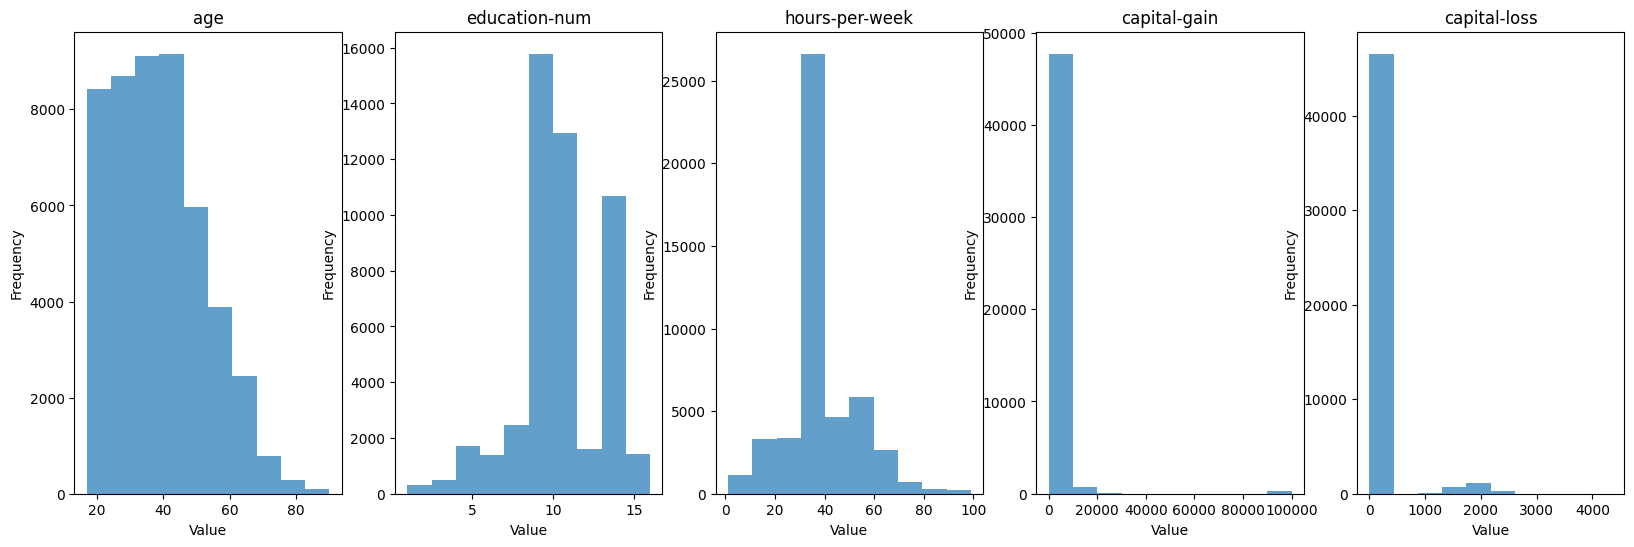

In [377]:
def plot(columnName, index):
    plt.subplot(1, 5, index)
    plt.hist(X[columnName], alpha=0.7)
    plt.title(columnName)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.figure(figsize=(20, 6))

plot("age", 1)
plot("education-num", 2)
plot("hours-per-week", 3)
plot("capital-gain", 4)
plot("capital-loss", 5)


plt.show()


In [378]:
def removeOutliers(columnName,X):
    X1 = X[columnName].quantile(0.25)
    X3 = X[columnName].quantile(0.75)
    IQR = X3 - X1
    lower_limit = X1 - 1.5*IQR
    upper_limit = X3 + 1.5*IQR
    print(lower_limit, upper_limit)
    X_updated = X[(X[columnName]>lower_limit)&(X[columnName]<upper_limit)]
    return X_updated

### Capital Gain and Capital Loss weren't chosen because the majority of the data in those columns is 0 thus removing most of the dataset

In [379]:
X = removeOutliers("age",X)
X = removeOutliers("education-num",X)
X = removeOutliers("hours-per-week",X)
X


-2.0 78.0
4.5 16.5
32.5 52.5


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,13,Other,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,9,Other,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,13,Married,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


### Checking for duplicate records

In [380]:
X.duplicated().sum()

33

In [381]:
X.drop_duplicates(inplace=True)

In [382]:
y = X[["income"]].copy()
X = X.drop("income", axis=1)
y

,income
0,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
...,...
48836,<=50K
48837,<=50K
48838,<=50K
48839,<=50K


# Label Encoding


In [383]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X["workclass"] = label_encoder.fit_transform(X["workclass"])
X["marital-status"]= label_encoder.fit_transform(X["marital-status"])
X["occupation"] = label_encoder.fit_transform(X["occupation"])
X["relationship"] = label_encoder.fit_transform(X["relationship"])
X["race"] = label_encoder.fit_transform(X["race"])
X["sex"] = label_encoder.fit_transform(X["sex"])
X["native-country"] = label_encoder.fit_transform(X["native-country"])
X

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,13,1,0,1,4,1,2174,0,40,38
2,38,3,215646,9,2,5,1,4,1,0,0,40,38
3,53,3,234721,7,0,5,0,2,1,0,0,40,38
4,28,3,338409,13,0,9,5,2,0,0,0,40,4
5,37,3,284582,14,0,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,3,245211,13,1,9,3,4,1,0,0,40,38
48837,39,3,215419,13,2,9,1,4,0,0,0,36,38
48838,64,3,321403,9,2,9,2,2,1,0,0,40,38
48839,38,3,374983,13,0,9,0,4,1,0,0,50,38


<Axes: >

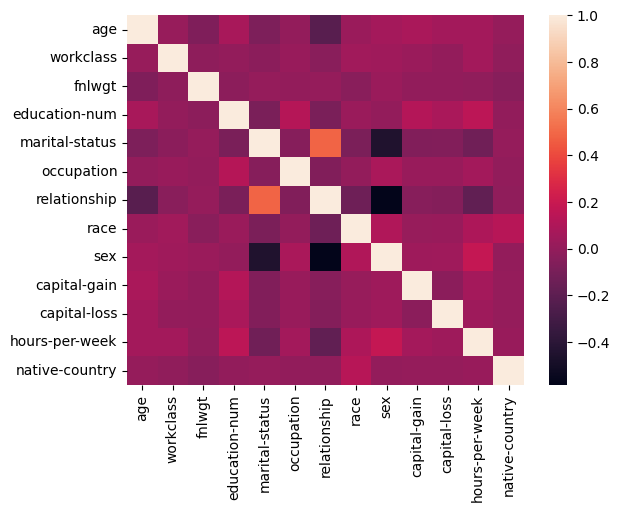

In [384]:
sns.heatmap(X.corr())

# Training the Models

In [385]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [386]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (27166, 13)
X_test shape: (6792, 13)
Y_train shape: (27166, 1)
Y_test shape: (6792, 1)


### Integrating SMOTE to balance the training dataset

In [387]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=45)
X_over,y_over = smote.fit_resample(X_train,y_train)

In [388]:
y_over["income"].value_counts()


income
>50K     20050
<=50K    20050
Name: count, dtype: int64

## Training of the Naive-Bayes Model


In [389]:
# Build a Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Model training
model.fit(X_over, y_over)

c:\Users\navam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

## Performance of the Naive-Bayes algorithm


              precision    recall  f1-score   support

       <=50K       0.79      0.93      0.86      5043
        >50K       0.60      0.29      0.39      1749

    accuracy                           0.77      6792
   macro avg       0.69      0.61      0.62      6792
weighted avg       0.74      0.77      0.74      6792



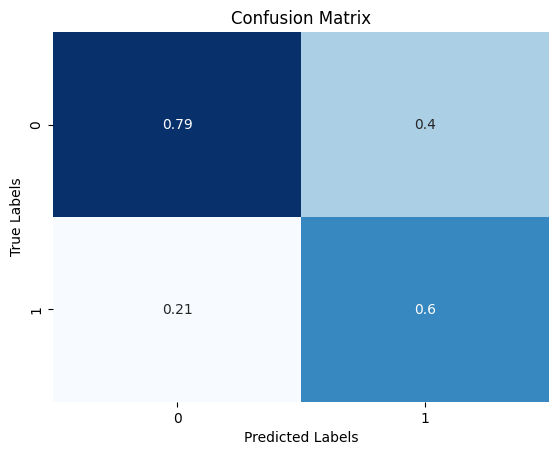

In [390]:
#Predictions for Naive-Bayes
from sklearn.metrics import classification_report,confusion_matrix
y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction ))

result = confusion_matrix(y_test, y_prediction , normalize='pred')


sns.heatmap(result, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



## Training the Random Forest Model


In [391]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=60)
model2.fit(X_over, y_over)

c:\Users\navam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=60)

## Performance of the Random Forest Classifier


              precision    recall  f1-score   support

       <=50K       0.89      0.87      0.88      5043
        >50K       0.64      0.69      0.66      1749

    accuracy                           0.82      6792
   macro avg       0.77      0.78      0.77      6792
weighted avg       0.83      0.82      0.82      6792



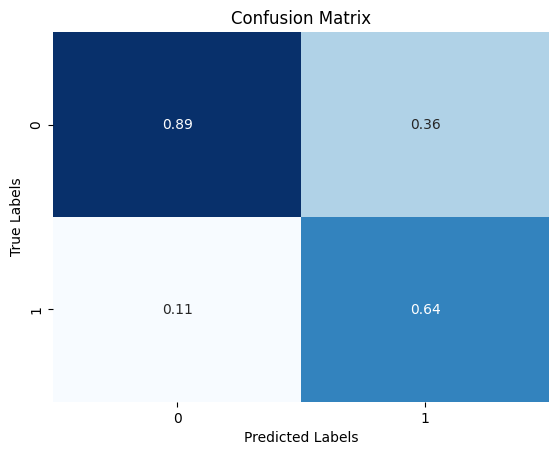

In [392]:
#Predictions for Naive-Bayes
y_prediction = model2.predict(X_test)
print(classification_report(y_test, y_prediction ))
result = confusion_matrix(y_test, y_prediction , normalize='pred')

sns.heatmap(result, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()